In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

## Load dataset

In [2]:
x_train = np.array([1.0, 1.4, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([300, 340, 450, 590, 630, 740,])

m = x_train.shape[0] # number of traning examples

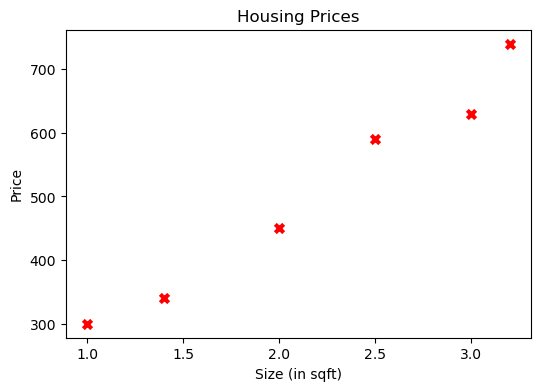

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train, marker='x', c='r', lw=3)
plt.title("Housing Prices")
plt.ylabel('Price')
plt.xlabel('Size (in sqft)')
plt.show()

## Simple linear regression model

**$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$**

In [4]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

#### `sample`

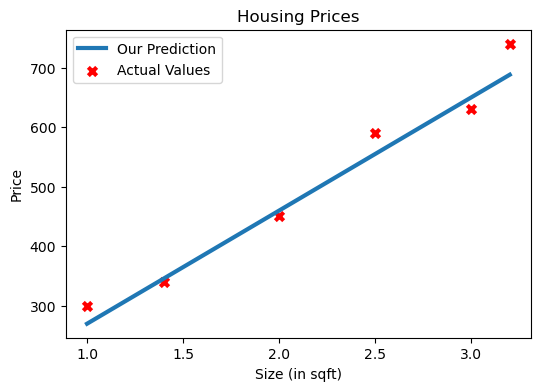

In [5]:
w = 190
b = 80

tmp_f_wb = compute_model_output(x_train, w, b,)

plt.figure(figsize=(6,4))
plt.plot(x_train, tmp_f_wb, label='Our Prediction', lw=3)
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values', lw=3)

plt.title("Housing Prices")
plt.ylabel('Price')
plt.xlabel('Size (in sqft)')
plt.legend()
plt.show()

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(x_train, tmp_f_wb, marker='x',label='Our Prediction', lw=3)
plt.scatter(x_train, y_train, marker='x', label='Actual Values', lw=3)
plt.title("Housing Prices")
plt.ylabel('Price')
plt.xlabel('Size (in sqft)')
plt.legend()
plt.show()

### Computing Cost

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [7]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

In [8]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    # An array to store cost J and w's at each itertion primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient function
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # Update Parameters using equation above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        # Save cost J at each iteration
        if i<1000000:    # prevent resource exhaustion
            J_history.append( cost_function(x, y, w, b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:.3f} ",
                  f"dj_dw: {dj_dw:.3f}, dj_db: {dj_db:.3f} ",
                  f"w: {w:.3f}, b:{b:.3f}")
    return w, b, J_history, p_history  # return w and J,w history for graphing

In [10]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1e-2

In [11]:
# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 124455.143  dj_dw: -1234.833, dj_db: -508.333  w: 12.348, b:5.083
Iteration 1000: Cost 348.469  dj_dw: 0.036, dj_db: -0.087  w: 195.196, b:82.069
Iteration 2000: Cost 348.432  dj_dw: 0.013, dj_db: -0.031  w: 194.973, b:82.612
Iteration 3000: Cost 348.427  dj_dw: 0.005, dj_db: -0.011  w: 194.892, b:82.808
Iteration 4000: Cost 348.427  dj_dw: 0.002, dj_db: -0.004  w: 194.863, b:82.879
Iteration 5000: Cost 348.426  dj_dw: 0.001, dj_db: -0.001  w: 194.852, b:82.904
Iteration 6000: Cost 348.426  dj_dw: 0.000, dj_db: -0.001  w: 194.848, b:82.914
Iteration 7000: Cost 348.426  dj_dw: 0.000, dj_db: -0.000  w: 194.847, b:82.917
Iteration 8000: Cost 348.426  dj_dw: 0.000, dj_db: -0.000  w: 194.847, b:82.918
Iteration 9000: Cost 348.426  dj_dw: 0.000, dj_db: -0.000  w: 194.846, b:82.919
(w,b) found by gradient descent: (194.8463,  82.9189)


In [12]:
def plotHistory(history, ylabel):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
    ax1.plot(history[:100], lw=3)
    ax2.plot(history[1000:], lw=3)

    ax1.set_title(f"{ylabel} vs. iteration(start)")
    ax1.set_xlabel('iteration step')
    ax1.set_ylabel(ylabel)

    ax2.set_title(f"{ylabel} vs. iteration (end)")
    ax2.set_xlabel('iteration step')
    ax2.set_ylabel(ylabel) 
    
    plt.show()

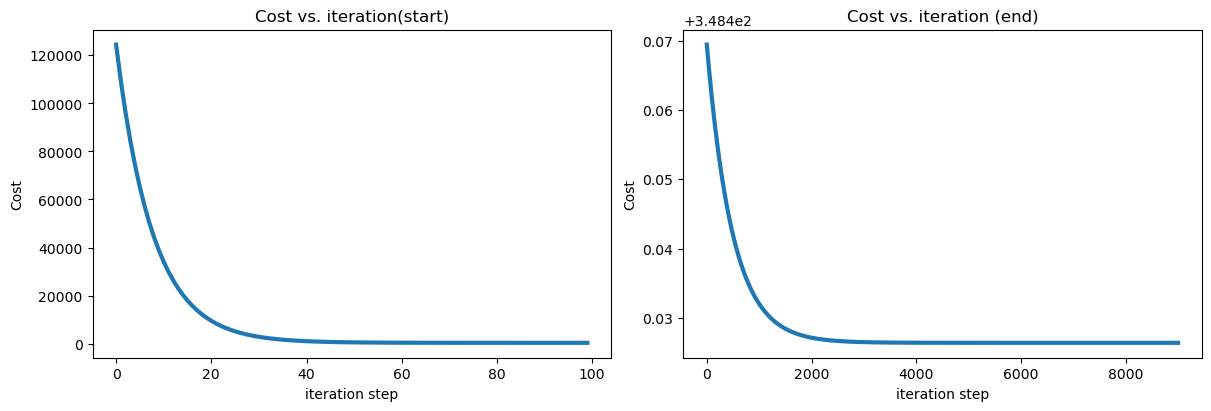

In [13]:
plotHistory(J_hist, 'Cost')

In [14]:
plotHistory(p_hist, '(w, b)')

In [15]:
y_pred = []
for x in x_train:
    f_wb = w_final*x + b_final
    y_pred.append(f_wb)

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x_train, y_train, marker='x', label='Actual', lw=3)
ax.scatter(x_train, y_pred, marker='x', label='Predicted', lw=3)
plt.legend()
plt.show()

In [17]:
def r2_score(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    print(f"R² Score: {r2:.4f}")
    return r2

In [18]:
r2 = r2_score(y_train, y_pred)

R² Score: 0.9722
